In [1]:

from Project1_Code import *


# Mathematics for Machine Learning

## Question 3


Task 1: Create an algorithm for low rank approximation using svd-based factorization

Task 2: Plot the errors for L^2 and other norms

The following code block initializes some matrices and computes their reduction for some given k

In [2]:
B = np.array([[3, 2, 5, 1, 0, 2, 4, 3, 1, 0],             [0, 1, 3, 4, 1, 2, 0, 0, 2, 4],             [2, 1, 3, 4, 2, 5, 0, 0, 3, 0],             [0, 4, 2, 3, 7, 0, 2, 5, 2, 1],             [3, 0, 0, 2, 4, 1, 0, 3, 1, 0],             [2, 0, 0, 0, 5, 2, 0, 2, 0, 4],

             [3, 4, 0, 2, 0, 0, 2, 4, 5, 0],             [2, 5, 0, 0, 3, 2, 5, 0, 0, 0],             [3, 1, 3, 4, 0, 0, 0, 0, 3, 2],             [0, 0, 0, 3, 4, 0, 0, 2, 3, 0],             [3, 0, 0, 4, 0, 5, 2, 0, 0, 1],            [2, 2, 0, 3, 0, 4, 0, 0, 2, 3]])


A = np.array([[5, 0, 2, -1] , [2, -1, 5, 0], [1, -2, 0, -5], [0, 5, -1, 2]])
# Get SVD
U, S, Vh = np.linalg.svd(A)

# Get Reduction
U_k, S_k, Vh_k = get_low_rank(U, S, Vh, 3)

# Make matrix
A_k = np.linalg.multi_dot([U_k, S_k, Vh_k])


We proceed by computing the reconstruction errors for varying k given some norms in a list.

fro: [7.48331477e+00 4.47213595e+00 2.00000000e+00 5.88418203e-15]
 
nuc: [1.20000000e+01 6.00000000e+00 2.00000000e+00 9.94236074e-15]
 
inf: [6.00000000e+00 4.00000000e+00 2.00000000e+00 4.88498131e-15]
 
-inf: [6.00000000e+00 4.00000000e+00 2.00000000e+00 4.10782519e-15]
 
1: [6.00000000e+00 4.00000000e+00 2.00000000e+00 5.10702591e-15]
 
-1: [6.00000000e+00 4.00000000e+00 2.00000000e+00 3.33066907e-15]
 
sqrt: [5.60000000e+01 2.00000000e+01 4.00000000e+00 3.46235982e-29]
 


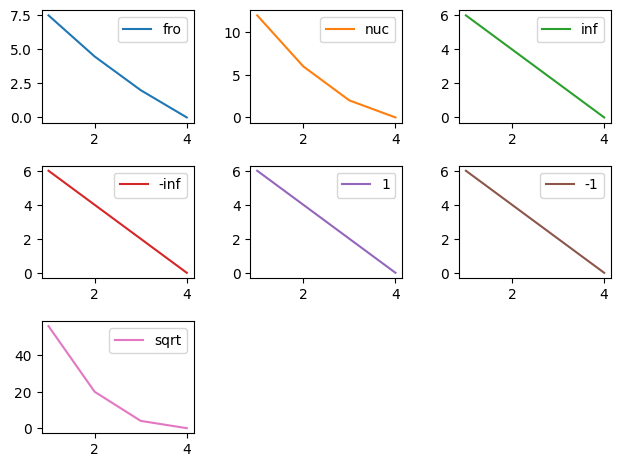

In [3]:
#list of norms
list = ['fro', 'nuc', np.inf, -np.inf, 1 , -1, 'sqrt']
colors = plt.rcParams["axes.prop_cycle"]()

X = range(1, np.size(S) + 1)

figure, axis = plt.subplots(3, 3)
figure.tight_layout(pad = 1.0)

figure.delaxes(axis[2, 2])
figure.delaxes(axis[2, 1])

i = 0
j = 0

# Iterate through norms
for norm in list:
    c = next(colors)["color"]
    axis[i, j].plot(X, get_errors(A, U, S, Vh, norm), label=norm, color=c)
    axis[i, j].legend()
    j = j + 1
    if j % 3 == 0:
        j = 0
        i = i + 1

plt.show()

## Question 4, Question 5 and Question 6

Task 1: Import the data set and randomly remove 10% of the ratings

Task 2: Build an R matrix with i representing an item, j representing a user and Rij representing the rating user j gave to item i

Task 3: Build a recommendation system based on svd-factorization

Task 4: Build a recommendation system based on stochastic gradient descent and alternating least squares

Task 5: Compare them using metrics

In [4]:

# Read data
data_read = read_csv(r"ratings.csv")

data_read = np.array(data_read)

# Delete first row and last column
data = np.delete(data_read, 0, axis = 0)
data = np.delete(data, -1, axis=1)

userIds = data[:, 0].astype('int')
movieIds = data[:, 1].astype('int')

userIds = np.unique(userIds)
movieIds = np.unique(movieIds)


In [5]:
train, test = data_split(data, 0.1)

k_global = 2

In [6]:
R = getR(train, userIds, movieIds)

R_imp = getR(train, userIds, movieIds)

### Missing values = 0

In [7]:
U, S, Vh = np.linalg.svd(R, full_matrices=False)

U_k, S_k, Vh_k = get_low_rank(U, S, Vh, k_global)

M = np.dot(U_k, S_k)

U = Vh_k

get_metrics(train, test, M, U, movieIds)


Train error metrics: RMSE: 2.95653; MAE: 2.72027.
Test error metrics: RMSE: 3.00756; MAE: 2.7746.


(2.95653, 3.00756, 2.72027, 2.7746)

### Missing values = mean of users

In [8]:
R_users = imput_R(R_imp, 'mean_users')

U, S, Vh = np.linalg.svd(R_users, full_matrices=False)

U_k, S_k, Vh_k = get_low_rank(U, S, Vh, k_global)

M = np.dot(U_k, S_k)

U = Vh_k

get_metrics(train, test, M, U, movieIds)


Train error metrics: RMSE: 2.77238; MAE: 2.41959.
Test error metrics: RMSE: 2.81172; MAE: 2.46442.


(2.77238, 2.81172, 2.41959, 2.46442)

### Missing values = mean of movies

In [9]:
R_movies = imput_R(R_imp, 'mean_movies')

U, S, Vh = np.linalg.svd(R_movies, full_matrices=False)

U_k, S_k, Vh_k = get_low_rank(U, S, Vh, k_global)

M = np.dot(U_k, S_k)

U = Vh_k

get_metrics(train, test, M, U, movieIds)


Train error metrics: RMSE: 0.84462; MAE: 0.64139.
Test error metrics: RMSE: 1.14757; MAE: 0.82654.


(0.84462, 1.14757, 0.64139, 0.82654)

### SVG

In [10]:

args = ['uniform', 0, 1]

M_init, U_init = get_random_arrays(R, k_global, args)

iters = [2, 4, 8, 16, 32]

train_error_RSME = []
test_error_RSME = []

train_error_MAE = []
test_error_MAE = [] 

for i in iters:
    M, U = sgd(M_init, U_init, R, iters = i)

    RMSE_train, RMSE_test, MAE_train, MAE_test = get_metrics(
        train, test, M, U, movieIds)
    
    train_error_RSME.append(RMSE_train)
    test_error_RSME.append(RMSE_test)
    train_error_MAE.append(MAE_train)
    test_error_MAE.append(MAE_test)



Train error metrics: RMSE: 2.09808; MAE: 1.78771.
Test error metrics: RMSE: 2.11537; MAE: 1.81163.
Train error metrics: RMSE: 1.40117; MAE: 1.11573.
Test error metrics: RMSE: 1.44582; MAE: 1.15634.
Train error metrics: RMSE: 1.07165; MAE: 0.83068.
Test error metrics: RMSE: 1.14683; MAE: 0.88721.
Train error metrics: RMSE: 0.90606; MAE: 0.69876.
Test error metrics: RMSE: 1.00505; MAE: 0.76811.
Train error metrics: RMSE: 0.82711; MAE: 0.63798.
Test error metrics: RMSE: 0.94918; MAE: 0.72145.


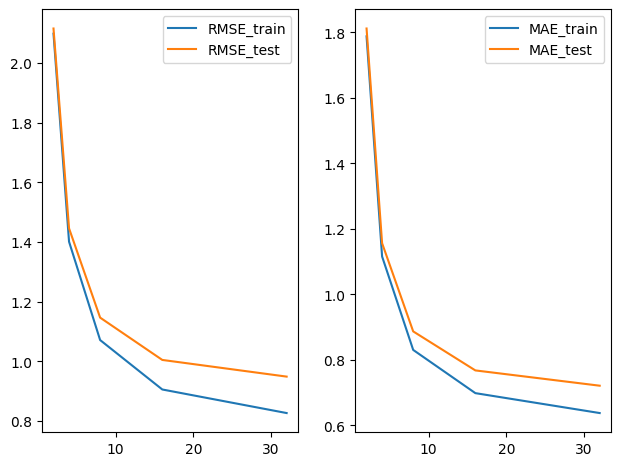

In [11]:

figure, axis = plt.subplots(1, 2)
figure.tight_layout(pad=1.0)

axis[0].plot(iters, train_error_RSME, label="RMSE_train")
axis[0].plot(iters, test_error_RSME, label="RMSE_test")
axis[0].legend()

axis[1].plot(iters, train_error_MAE, label="MAE_train")
axis[1].plot(iters, test_error_MAE, label="MAE_test")
axis[1].legend()

plt.show()


### ALS

In [12]:

args = ['uniform', 0, 1]

M_init, U_init = get_random_arrays(R, k_global, args)

iters = [2, 4, 8, 16, 32]

train_error_RSME = []
test_error_RSME = []

train_error_MAE = []
test_error_MAE = []

for i in iters:
    M, U = als(M_init, U_init, R, iters=i)

    RMSE_train, RMSE_test, MAE_train, MAE_test = get_metrics(
        train, test, M, U, movieIds)

    train_error_RSME.append(RMSE_train)
    test_error_RSME.append(RMSE_test)
    train_error_MAE.append(MAE_train)
    test_error_MAE.append(MAE_test)


Train error metrics: RMSE: 0.75268; MAE: 0.56648.
Test error metrics: RMSE: 1.12947; MAE: 0.80013.
Train error metrics: RMSE: 0.72798; MAE: 0.54255.
Test error metrics: RMSE: 1.12396; MAE: 0.79048.
Train error metrics: RMSE: 0.71735; MAE: 0.53409.
Test error metrics: RMSE: 1.11268; MAE: 0.77981.
Train error metrics: RMSE: 0.71621; MAE: 0.5333.
Test error metrics: RMSE: 1.10952; MAE: 0.77777.
Train error metrics: RMSE: 0.71521; MAE: 0.53277.
Test error metrics: RMSE: 1.10941; MAE: 0.77815.


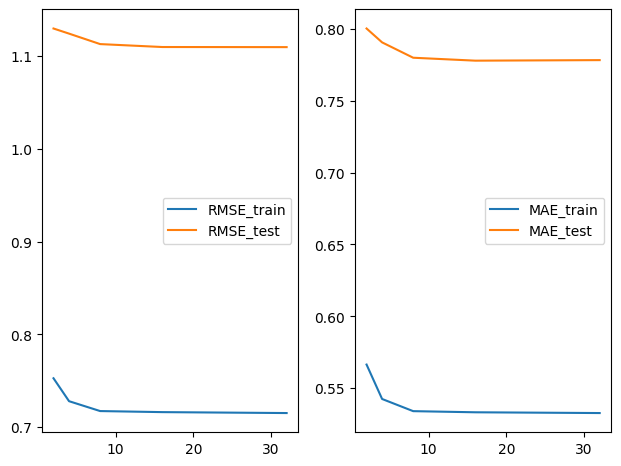

In [13]:
figure, axis = plt.subplots(1, 2)
figure.tight_layout(pad=1.0)

axis[0].plot(iters, train_error_RSME, label="RMSE_train")
axis[0].plot(iters, test_error_RSME, label="RMSE_test")
axis[0].legend()

axis[1].plot(iters, train_error_MAE, label="MAE_train")
axis[1].plot(iters, test_error_MAE, label="MAE_test")
axis[1].legend()

plt.show()


## Question 7

In [14]:
movies_read = read_csv(r"movies.csv")


movies = movies_read[1:51]

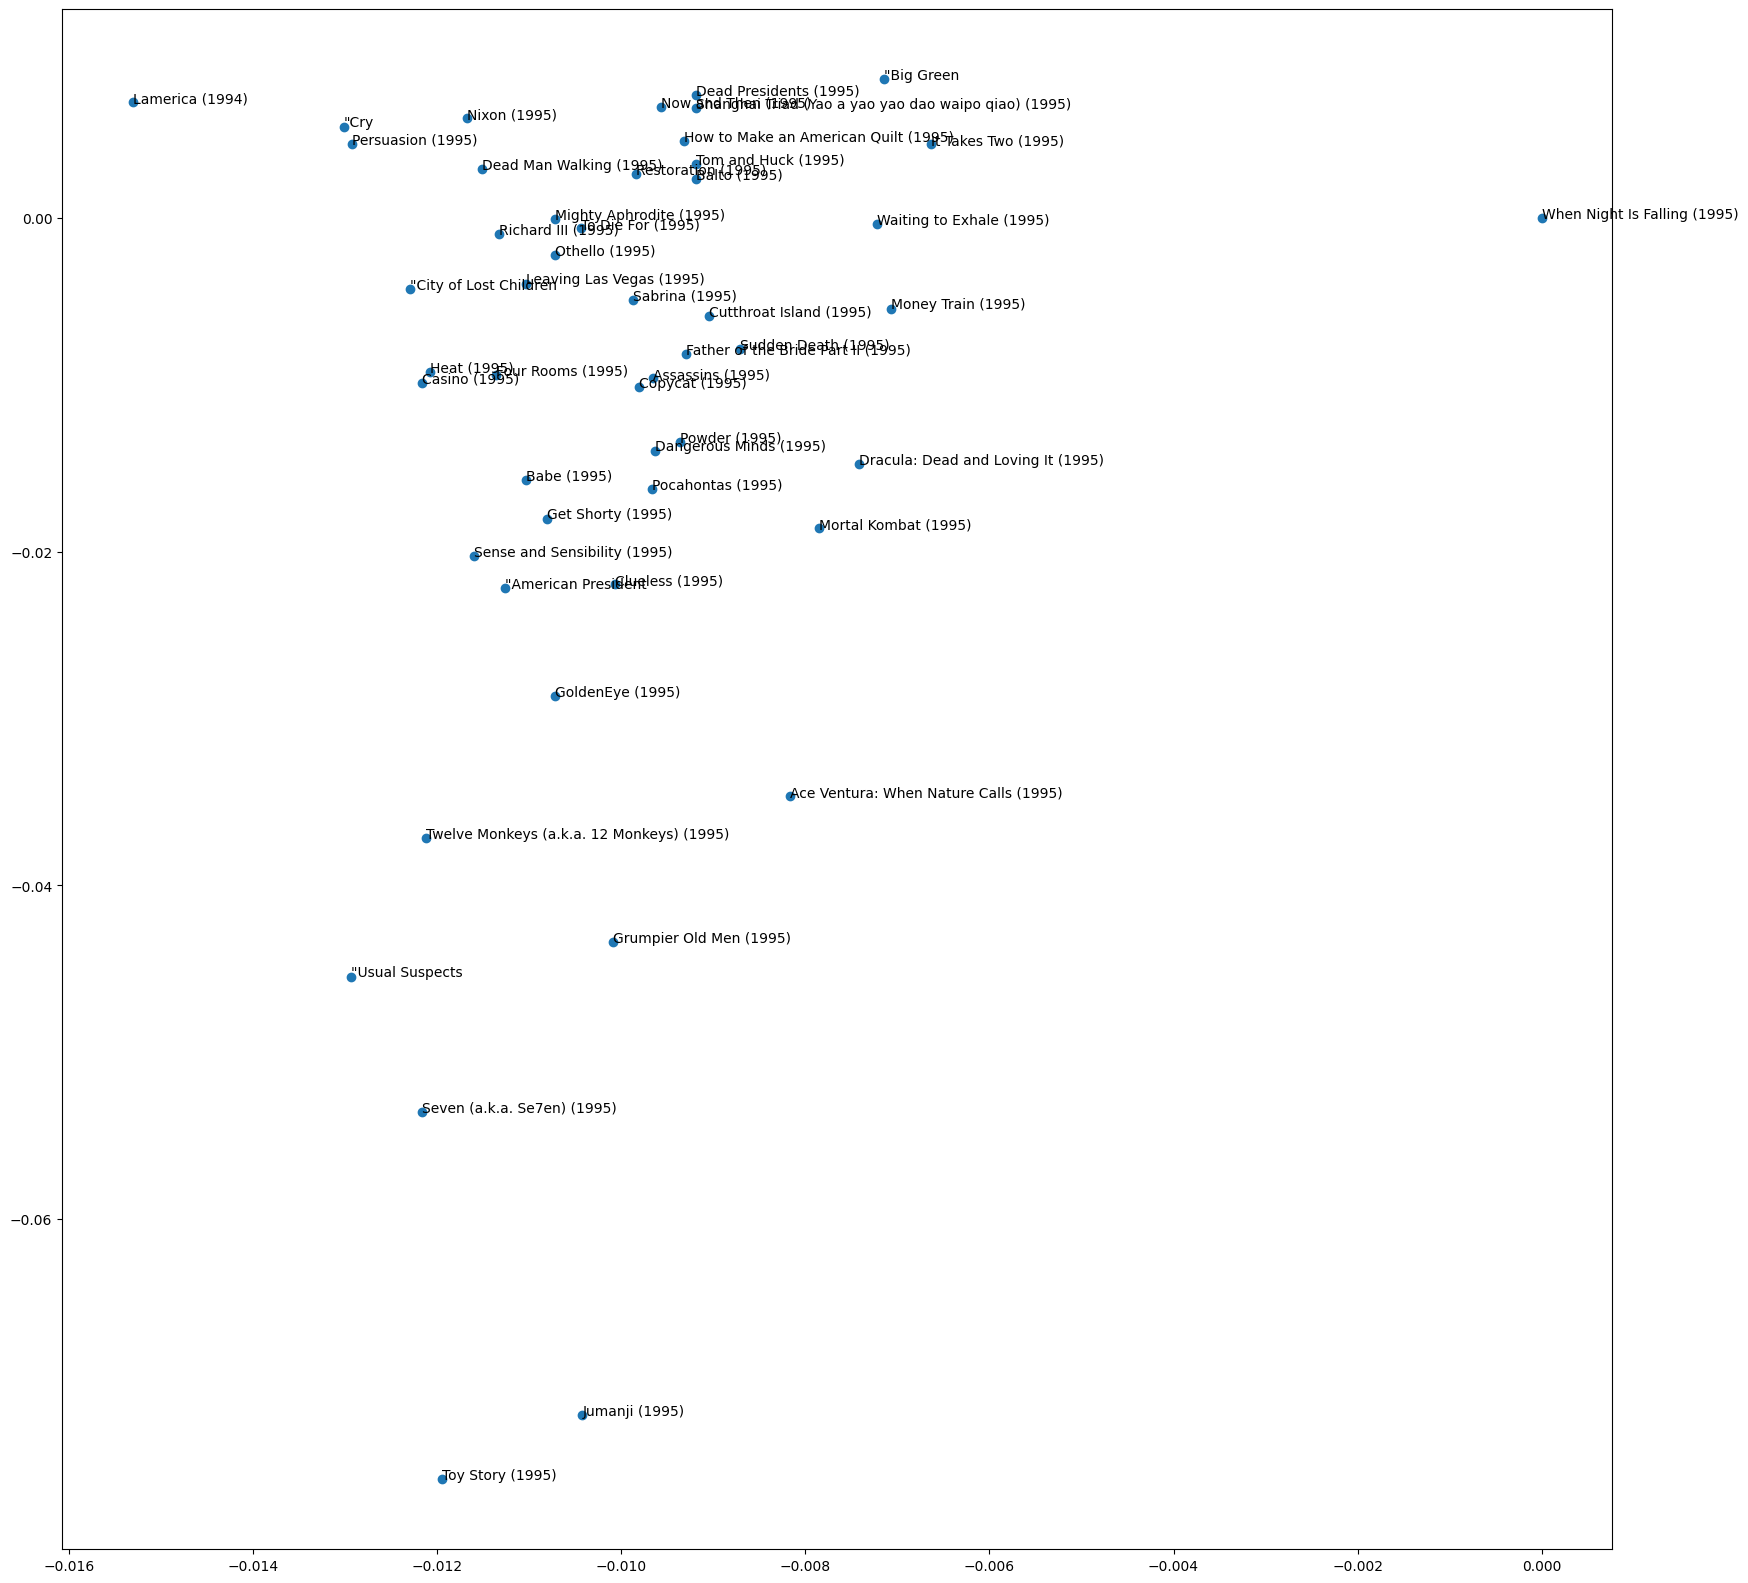

In [15]:
R_movies = imput_R(R_imp, 'mean_movies')

U, S, Vh = np.linalg.svd(R_movies, full_matrices=False)

U_k, S_k, Vh_k = get_low_rank(U, S, Vh, 2)

plot_movies(U_k, movies, movieIds)


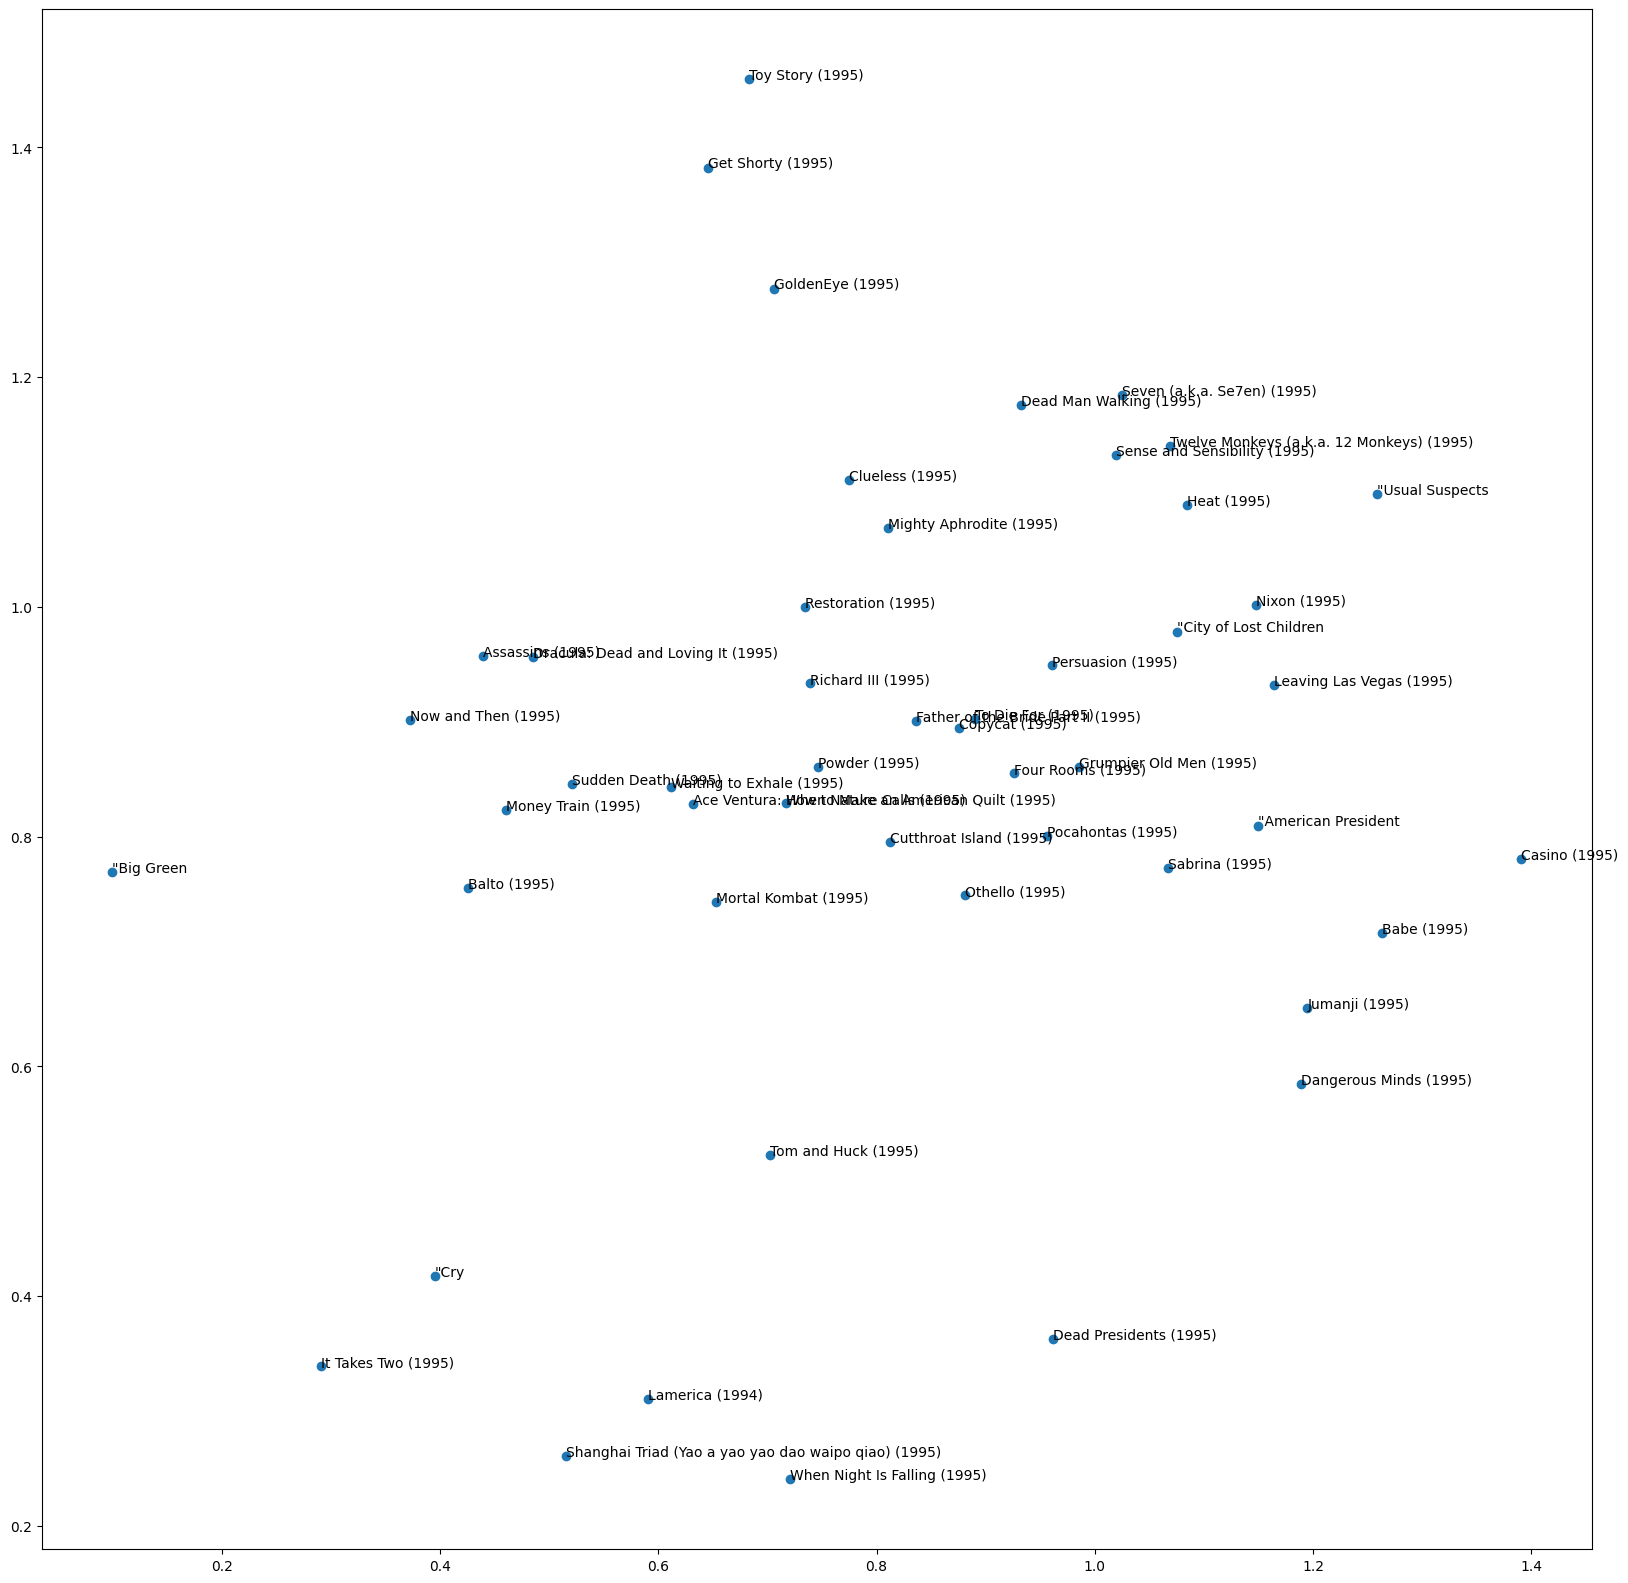

In [18]:
M_init, U_init = get_random_arrays(R, 2, args)

M, U = sgd(M_init, U_init, R, iters=16)

plot_movies(M, movies, movieIds)


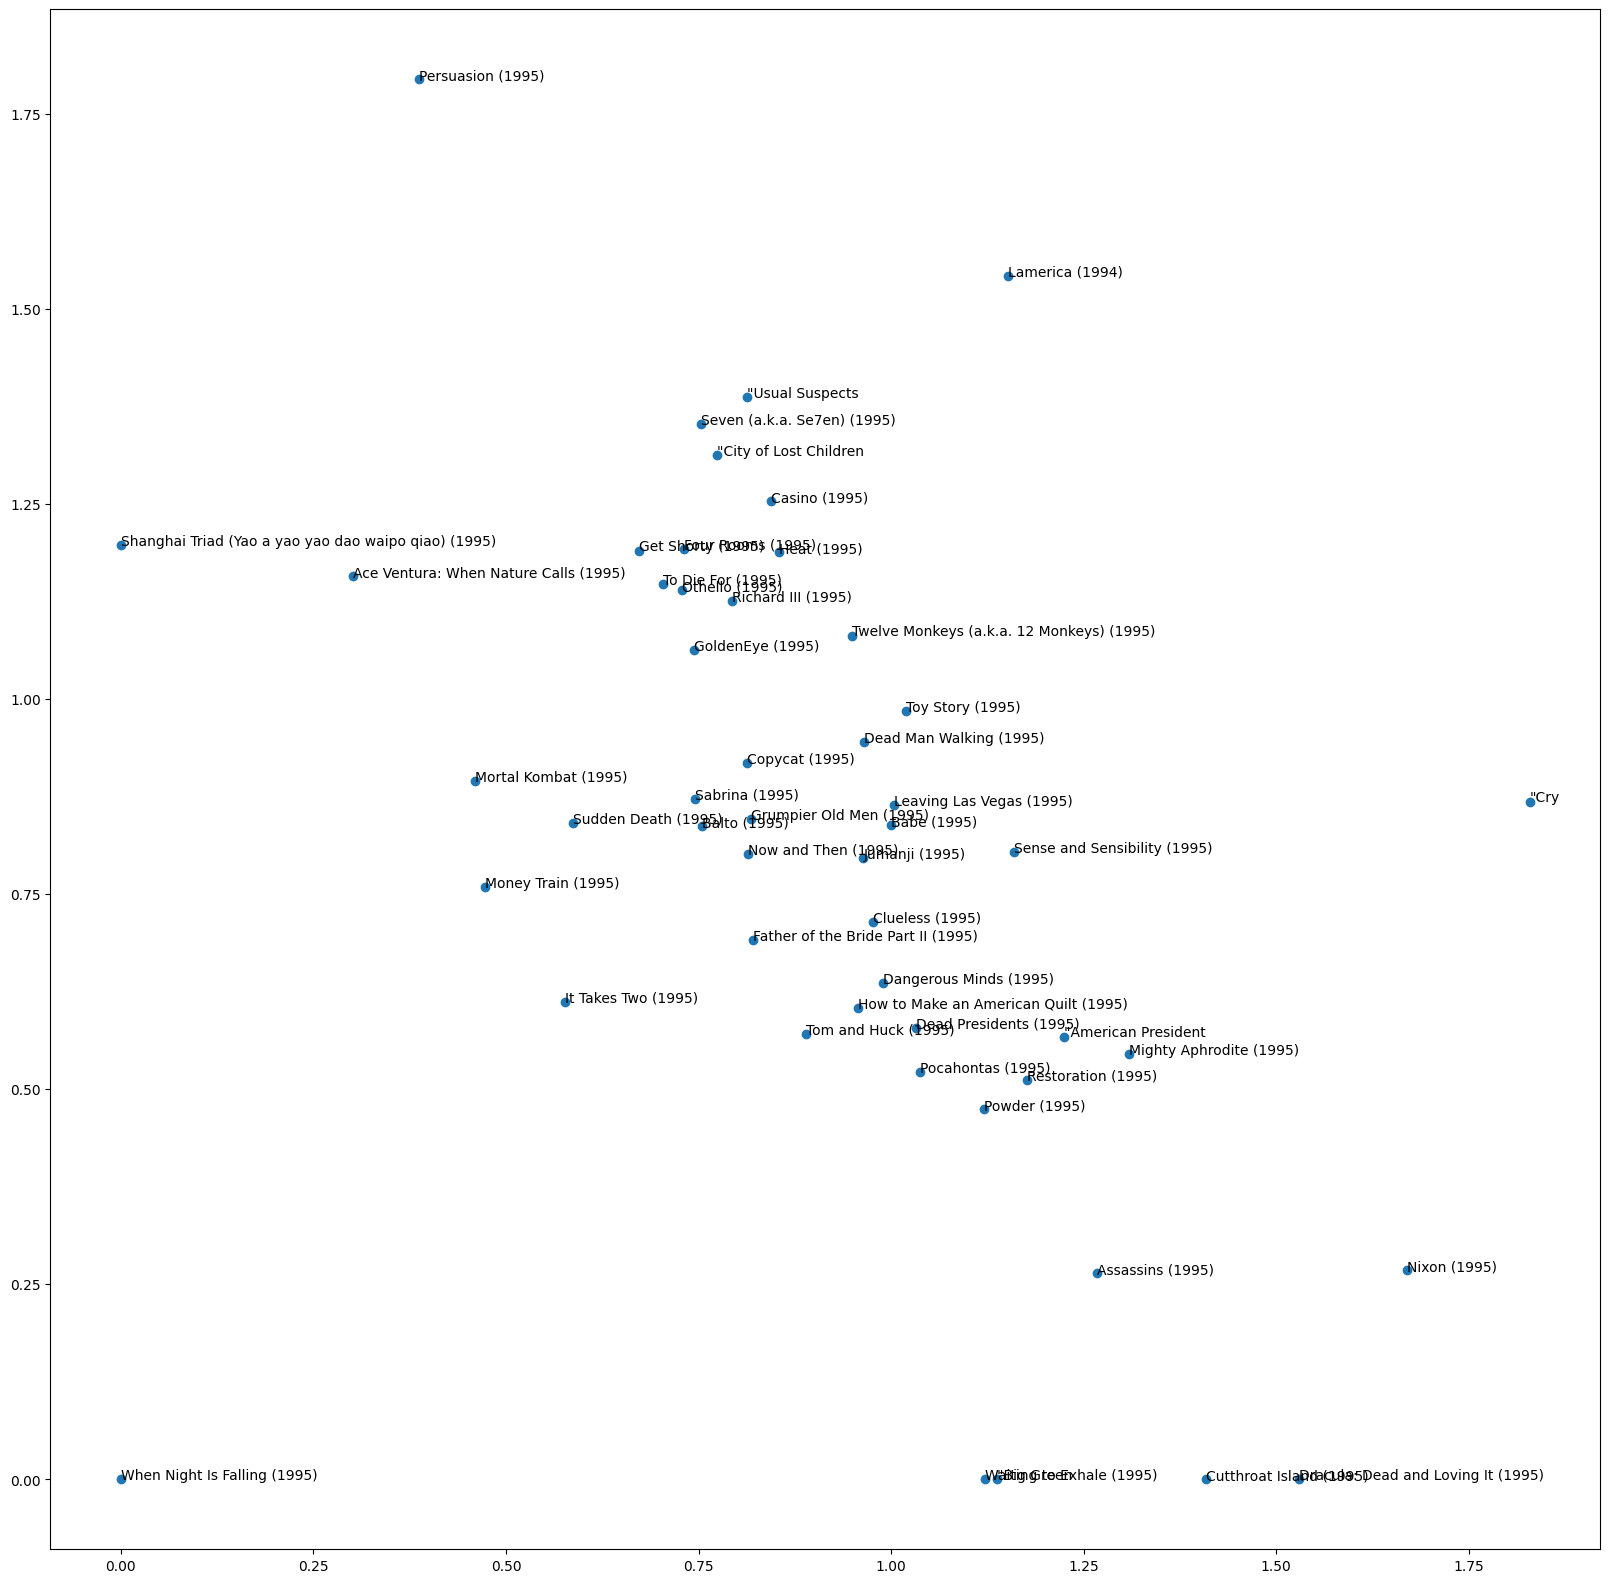

In [20]:
M, U = als(M_init, U_init, R, iters=16)

plot_movies(M, movies, movieIds)
